## EXERCISE 3
### ECEN 289 
### TYLER SMITH - 826005315

In [1]:
#Libraries that will be used 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame


### Part 2: Creating a project dataframe

In [2]:
#Creating the dataframe
df = pd.read_csv('BATTERY-POWERED-DRILLS.csv')
df

,Manufacturer,Model Identifier,Battery Voltage,Maximum Chuck Size,"Brushless or brushed motor (0,1)","Number of batteries included (0, 1 or 2)",Highest RPM on low-speed setting,Highest RPM on high-speed setting,Price,Max torque in Newton-meter,Max torque inch-pounds,Units-Watts-Out,Source
0,DEWALT,DCD710B,12,0.375,1,0,1500,1500,113.80,NaN,NaN,189.0,https://www.grainger.com/product/DEWALT-Drill-...
1,DEWALT,DCD710S2,12,0.375,1,2,1500,1500,166.15,NaN,NaN,189.0,https://www.grainger.com/product/DEWALT-Drill-...
2,DEWALT,DCD708B,20,0.500,0,0,450,1650,189.48,NaN,NaN,340.0,https://www.grainger.com/product/DEWALT-Drill-...
3,DEWALT,DCD708C2,20,0.500,0,2,450,1650,270.43,NaN,NaN,340.0,https://www.grainger.com/product/DEWALT-Drill-...
4,DEWALT,DCD791B,20,0.500,0,0,550,2000,170.81,NaN,NaN,460.0,https://www.grainger.com/product/DEWALT-Drill-...
5,DEWALT,DCD791D2,20,0.500,0,2,550,2000,199.00,NaN,NaN,460.0,https://www.grainger.com/product/DEWALT-Drill-...
6,DEWALT,DCD780B,20,0.500,0,0,2000,2000,160.60,NaN,NaN,350.0,https://www.grainger.com/product/DEWALT-Drill-...
7,DEWALT,DCD780C2,20,0.500,0,2,2000,2000,246.48,NaN,NaN,350.0,https://www.grainger.com/product/DEWALT-Drill-...
8,DEWALT,DCD991B,20,0.500,0,0,450,2000,208.07,NaN,NaN,820.0,https://www.grainger.com/product/DEWALT-Drill-...
9,DEWALT,DCD980M2,20,0.500,0,2,2000,2000,350.96,NaN,NaN,535.0,https://www.grainger.com/product/DEWALT-Drill-...


In [3]:
#Getting the shape of the dataframe
print(df.shape)
#print(df.info)


(50, 13)


#### Using df.info() 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Manufacturer                              50 non-null     object 
 1   Model Identifier                          50 non-null     object 
 2   Battery Voltage                           50 non-null     int64  
 3   Maximum Chuck Size                        50 non-null     float64
 4   Brushless or brushed motor (0,1)          50 non-null     int64  
 5   Number of batteries included (0, 1 or 2)  50 non-null     int64  
 6   Highest RPM on low-speed setting          50 non-null     int64  
 7   Highest RPM on high-speed setting         50 non-null     int64  
 8   Price                                     50 non-null     float64
 9   Max torque in Newton-meter                0 non-null      float64
 10  Max torque inch-pounds                  

#### Cleaning the data
##### Computing the estimated torque
##### The data was very clean so nothing else is required

In [5]:
#Adding a column to the dataframe for estimated torque lb*in
df["est max torque"] = np.nan

In [6]:
#Pulling df values out and letting them become np arrays for handleing
torque_in_lb = df["Max torque inch-pounds"]
low_rpm = df["Highest RPM on low-speed setting"]
uwo = df["Units-Watts-Out"]
#print(torque_in_lb)

In [7]:
#Making the estimated torque column a float type 
df["est max torque"] = df["est max torque"].astype(float)

In [8]:
#computing the estimated torques
for i in range(0,len(uwo)):
    #if there is no value given for lb*in torque then it's computes
    #torque = UWO * 560 / low speed RPM
    if np.isnan(torque_in_lb[i]):
        
        est_torque = ( uwo[i] * 560 ) / low_rpm[i] 
        #print(est_torque)
    else:
        est_torque = torque_in_lb[i]
    df.at[i,"est max torque"] = est_torque
        

In [9]:
#print(df["est max torque"])

### Part 3: Statistics on data

#### Computing the mean, median, and standard deviation of the drill prices

In [10]:
price = df["Price"]

mean_price = np.mean(price)
print('\nArithmetic mean of the price: $',mean_price,'\n')

median_price = np.median(price)
print('\nMedian of the price: $',median_price,'\n')

std_price = np.std(price)
print('\nStandard Deviation of the price: $',std_price,'\n')


Arithmetic mean of the price: $ 241.38299999999995 


Median of the price: $ 209.215 


Standard Deviation of the price: $ 119.97467073095054 



#### Computing the mean, median, and standard deviation of estimated torques

In [11]:
est_max_torque = df["est max torque"]

mean_torque = np.mean(est_max_torque)
print('\nMean of estimated max torque',mean_torque,'lb*in\n')

median_torque = np.median(est_max_torque)
print('\nMedian of estimated max torque',median_torque,'lb*in\n')

std_torque = np.std(est_max_torque)
print('\nStandard Deviation of estimated max torque',std_torque,'lb*in\n')


Mean of estimated max torque 550.4085010101011 lb*in


Median of estimated max torque 474.1818181818182 lb*in


Standard Deviation of estimated max torque 363.87491078761843 lb*in



#### Computing the mean price for different battery offerings

In [12]:
#Determining the price of batteries
batteries = df["Number of batteries included (0, 1 or 2)"]
n_0 = 0 
n_1 = 0 
n_2 = 0
c_0 = 0
c_1 = 0
c_2 = 0

#Finding indexes of 0,1, or 2 batteries
#Then computing the sum of price and count of them
for i in range(0,len(batteries)):   
    if batteries[i] == 0:
        c_0 = c_0 + price[i]
        n_0 = n_0 + 1
    if batteries[i] == 1:
        c_1 = c_1 + price[i]
        n_1 = n_1 + 1
    if batteries[i] == 2:
        c_2 = c_2 + price[i]
        n_2 = n_2 + 1     
#Computing the means for each battery counts

mean_zero = c_0 / n_0
print('\nmean price of zero batteries: $', mean_zero,'\n')

mean_one = c_1 / n_1
print('\nmean price of one batteries: $', mean_one,'\n')

mean_two = c_2 / n_2
print('\nmean price of two batteries: $', mean_two,'\n')


mean price of zero batteries: $ 196.9152 


mean price of one batteries: $ 340.485 


mean price of two batteries: $ 281.0999999999999 



#### Quartile Rank of the Data

In [13]:
df.describe()

,Battery Voltage,Maximum Chuck Size,"Brushless or brushed motor (0,1)","Number of batteries included (0, 1 or 2)",Highest RPM on low-speed setting,Highest RPM on high-speed setting,Price,Max torque in Newton-meter,Max torque inch-pounds,Units-Watts-Out,est max torque
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.0,37.000000,13.000000,50.000000
mean,20.240000,0.462500,0.180000,0.960000,645.000000,1788.000000,241.383000,NaN,549.594595,610.230769,550.408501
std,11.202332,0.063135,0.388088,0.988918,449.526962,362.609589,121.192719,NaN,313.088065,456.810164,367.569167
min,12.000000,0.250000,0.000000,0.000000,350.000000,600.000000,81.230000,NaN,250.000000,189.000000,70.560000
25%,12.000000,0.375000,0.000000,0.000000,450.000000,1650.000000,160.667500,NaN,300.000000,340.000000,285.000000
50%,18.000000,0.500000,0.000000,0.500000,490.000000,1800.000000,209.215000,NaN,500.000000,460.000000,474.181818
75%,20.000000,0.500000,0.000000,2.000000,550.000000,2000.000000,276.040000,NaN,585.000000,820.000000,708.750000
max,60.000000,0.500000,1.000000,2.000000,2000.000000,2600.000000,633.160000,NaN,1250.000000,1540.000000,1437.333333


### Part 4: Visualizing Data

#### Histogram of the High Speed RPM

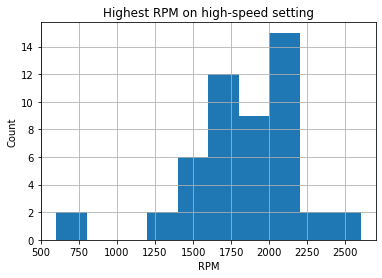

In [14]:
df.hist(column = "Highest RPM on high-speed setting")
plt.xlabel("RPM")
plt.ylabel("Count")
plt.show()

#### 8-bin Histogram of the Price

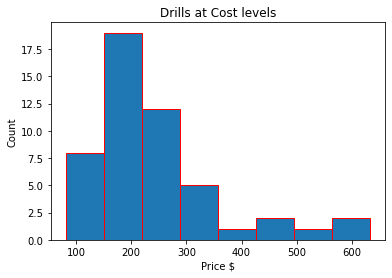

In [15]:
plt.hist(price, edgecolor = "red", bins = 8)
plt.xlabel("Price $")
plt.ylabel("Count")
plt.title("Drills at Cost levels")
plt.show()

# Start of Exercise 3
# Part 1: Perform Clustering of Performance Data

#### Libraries that will be used for exercise 3

In [16]:
import sklearn 
from sklearn.cluster import KMeans

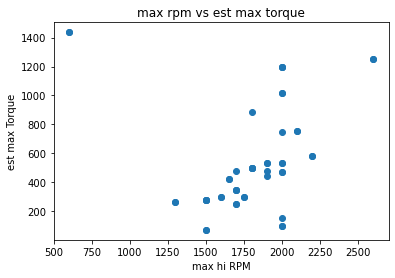

In [17]:
max_hi_rpm = df["Highest RPM on high-speed setting"]
plt.scatter(max_hi_rpm,est_max_torque)
plt.ylabel("est max Torque")
plt.xlabel("max hi RPM")
plt.title("max rpm vs est max torque")
plt.show()

In [18]:
#creating the data as an array type for kmeans // rpm, torque
data_k = df[['Highest RPM on high-speed setting',
             'est max torque']].to_numpy(dtype=float) 

#Used to plot the clusters
def plot_data(X): 
    #plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=24, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [19]:
#K means 2
k = 2 
kmeans_2 = KMeans(n_clusters=k,random_state=42)
y_pred_2 = kmeans_2.fit_predict(data_k)

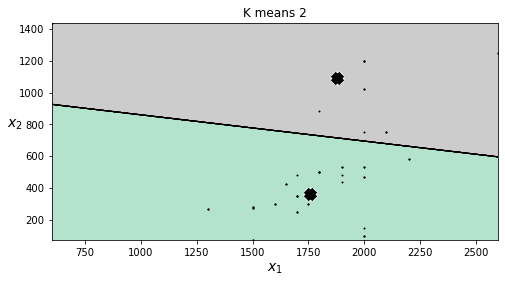

In [20]:
#K means 2 Plot
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_2,data_k)
plt.title('K means 2')
plt.show()

In [21]:
#K means 3
k = 3 
kmeans_3 = KMeans(n_clusters=k,random_state=42)
y_pred_3 = kmeans_3.fit_predict(data_k)

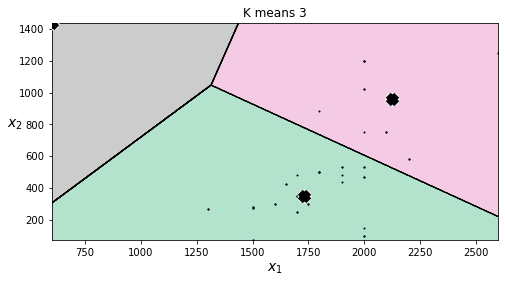

In [22]:
#K means 3 Plot
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_3,data_k)
plt.title('K means 3')
plt.show()

In [23]:
#K means 4
k = 4 
kmeans_4 = KMeans(n_clusters=k,random_state=42)
y_pred_4 = kmeans_4.fit_predict(data_k)

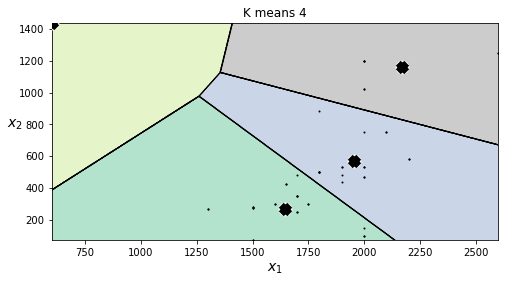

In [24]:
#K means 4 Plot
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_4,data_k)
plt.title('K means 4')
plt.show()

# Part 2: Regression analysis of price data

In [25]:
#Libraries used for regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#Gettingt the torque and price into arrays for regression
torque = df[['est max torque']].to_numpy(dtype=float)
price = df[['Price']].to_numpy(dtype=float)
#Splitting the data 70% Train 30% Test
x_train, x_test, y_train, y_test = train_test_split(torque,
                                                            price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [27]:
#Fitting the Linear Regression
lin_reg = LinearRegression().fit(x_train, y_train)

#Printing the parameters of the regression

#Determining the MSE and R2 score
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print('\nLinear Regression of Price and est max Torque')
print('\nIntercept: ', lin_reg.intercept_)
print('Coefficients: ', lin_reg.coef_)
print('Train Score: ', lin_reg.score(x_train,y_train))
print('Test Score: ', r2)
print('MSE: ', mse)


Linear Regression of Price and est max Torque

Intercept:  [135.27551085]
Coefficients:  [[0.21908952]]
Train Score:  0.32756811496926486
Test Score:  0.18210765659147554
MSE:  5111.149704614126


In [28]:
#Call for standardizing the features
from sklearn.preprocessing import StandardScaler

In [29]:
#Creating an array of all the features
features = df[['Battery Voltage',
              'Maximum Chuck Size',
              'Brushless or brushed motor (0,1)',
              'Number of batteries included (0, 1 or 2)',
              'Highest RPM on low-speed setting',
              'Highest RPM on high-speed setting',
              'est max torque']].to_numpy(dtype=float)


In [30]:
scaler = StandardScaler().fit(features)
trans_features = scaler.transform(features)
trans_features.shape

(50, 7)

In [31]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features,
                                                   price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [32]:
#Fitting the multi linear regression
mul_reg = LinearRegression().fit(x_train,y_train)

#Determining the MSE and R2 score
y_pred = mul_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the parameters of the regression
print('\nMulti-Linear Regression')
print('\nIntercept: ', mul_reg.intercept_)
print('\nVoltage Coefficient: ', mul_reg.coef_[0,0])
print('Chuck Size Coefficient: ', mul_reg.coef_[0,1])
print('Brush/Brushless Coefficient: ', mul_reg.coef_[0,2])
print('# Batteries Coefficient: ', mul_reg.coef_[0,3])
print('Low Speed RPM Coefficient: ', mul_reg.coef_[0,4])
print('High Speed RPM Coefficient: ', mul_reg.coef_[0,5])
print('Torque Coefficient: ', mul_reg.coef_[0,6])
print('\nTrain Score: ', mul_reg.score(x_train,y_train))
print('Test Score: ', r2)
print('MSE: ', mse)


Multi-Linear Regression

Intercept:  [66.88504557]

Voltage Coefficient:  6.247453019007077
Chuck Size Coefficient:  -659.7176756983266
Brush/Brushless Coefficient:  -41.0801447033913
# Batteries Coefficient:  53.25584330851389
Low Speed RPM Coefficient:  0.0318768925363588
High Speed RPM Coefficient:  0.11774819985990428
Torque Coefficient:  0.15128798471970903

Train Score:  0.7187917609138468
Test Score:  0.15332568555154236
MSE:  5291.013184159487


# Part 3: Determine most important features

In [33]:
#Splitting the data
#This run uses the scaled data
x_train, x_test, y_train, y_test = train_test_split(trans_features,
                                                   price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [34]:
#Fitting the multi linear regression with scaled data
mul_reg = LinearRegression().fit(x_train,y_train)

#Determining the MSE and R2 score
y_pred = mul_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the parameters of the regression
print('\nScaled Multi-Linear Regression')
print('\nIntercept: ', mul_reg.intercept_)
print('\nVoltage Coefficient: ', mul_reg.coef_[0,0])
print('Chuck Size Coefficient: ', mul_reg.coef_[0,1])
print('Brush/Brushless Coefficient: ', mul_reg.coef_[0,2])
print('# Batteries Coefficient: ', mul_reg.coef_[0,3])
print('Low Speed RPM Coefficient: ', mul_reg.coef_[0,4])
print('High Speed RPM Coefficient: ', mul_reg.coef_[0,5])
print('Torque Coefficient: ', mul_reg.coef_[0,6])
print('\nTrain Score: ', mul_reg.score(x_train,y_train))
print('Test Score: ', r2)
print('MSE: ', mse)


Scaled Multi-Linear Regression

Intercept:  [246.30982312]

Voltage Coefficient:  69.28264844005906
Chuck Size Coefficient:  -41.232354731144426
Brush/Brushless Coefficient:  -15.782476213652862
# Batteries Coefficient:  52.13635542389503
Low Speed RPM Coefficient:  14.185503709647616
High Speed RPM Coefficient:  42.26750368318777
Torque Coefficient:  55.049901943068726

Train Score:  0.7187917609138468
Test Score:  0.15332568555148174
MSE:  5291.013184159865


## Coefficients Ordered in order of correlation to price:
### Based off the magnitude of coefficients
#### 1) Voltage - Coefficient
#### 2) Torque - Coefficient
#### 3) # Batteries - Coefficient
#### 4) High Speed RPM - Coefficient
#### 5) Chuch Size - Coefficient
#### 6) Brush/Brushless - Coefficient
#### 7) Low Speed RPM - Coefficient

In [35]:
import statsmodels.api as sm
from scipy import stats

In [36]:
#Below Im using statsmodels to find the p value of the regression 
#The lower the p value the higher the correlation
x_train = sm.add_constant(x_train)
est = sm.OLS(y_train,x_train)
est_fit = est.fit()
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     9.859
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           4.66e-06
Time:                        21:47:20   Log-Likelihood:                -198.65
No. Observations:                  35   AIC:                             413.3
Df Residuals:                      27   BIC:                             425.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.3098     13.791     17.860      0.0

## Coefficients Ordered in order of correlation to price:
### Based off p value (not required but for extra accuracy)
#### 1) #Batteries - Coefficient
#### 2) Voltage - Coefficient
#### 3) Torque - Coefficient
#### 4) High Speed RPM - Coefficient
#### 5) Chuch Size - Coefficient
#### 6) Low Speed RPM - Coefficient
#### 7) Brush/Brushless - Coefficient

##### ***This should be the "true" significance of the coefficients // lower p value means higher correlation 

In [37]:
impt = mul_reg.coef_
print(impt)


[[ 69.28264844 -41.23235473 -15.78247621  52.13635542  14.18550371
   42.26750368  55.04990194]]


In [38]:
import seaborn as sns
df_redo = df
df_redo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Manufacturer                              50 non-null     object 
 1   Model Identifier                          50 non-null     object 
 2   Battery Voltage                           50 non-null     int64  
 3   Maximum Chuck Size                        50 non-null     float64
 4   Brushless or brushed motor (0,1)          50 non-null     int64  
 5   Number of batteries included (0, 1 or 2)  50 non-null     int64  
 6   Highest RPM on low-speed setting          50 non-null     int64  
 7   Highest RPM on high-speed setting         50 non-null     int64  
 8   Price                                     50 non-null     float64
 9   Max torque in Newton-meter                0 non-null      float64
 10  Max torque inch-pounds                  

In [39]:
df_redo_drop = df_redo.drop(columns = ['Manufacturer', 
                   'Model Identifier',
                  'Max torque in Newton-meter',
                  'Max torque inch-pounds',
                  'Units-Watts-Out',
                  'Source'])


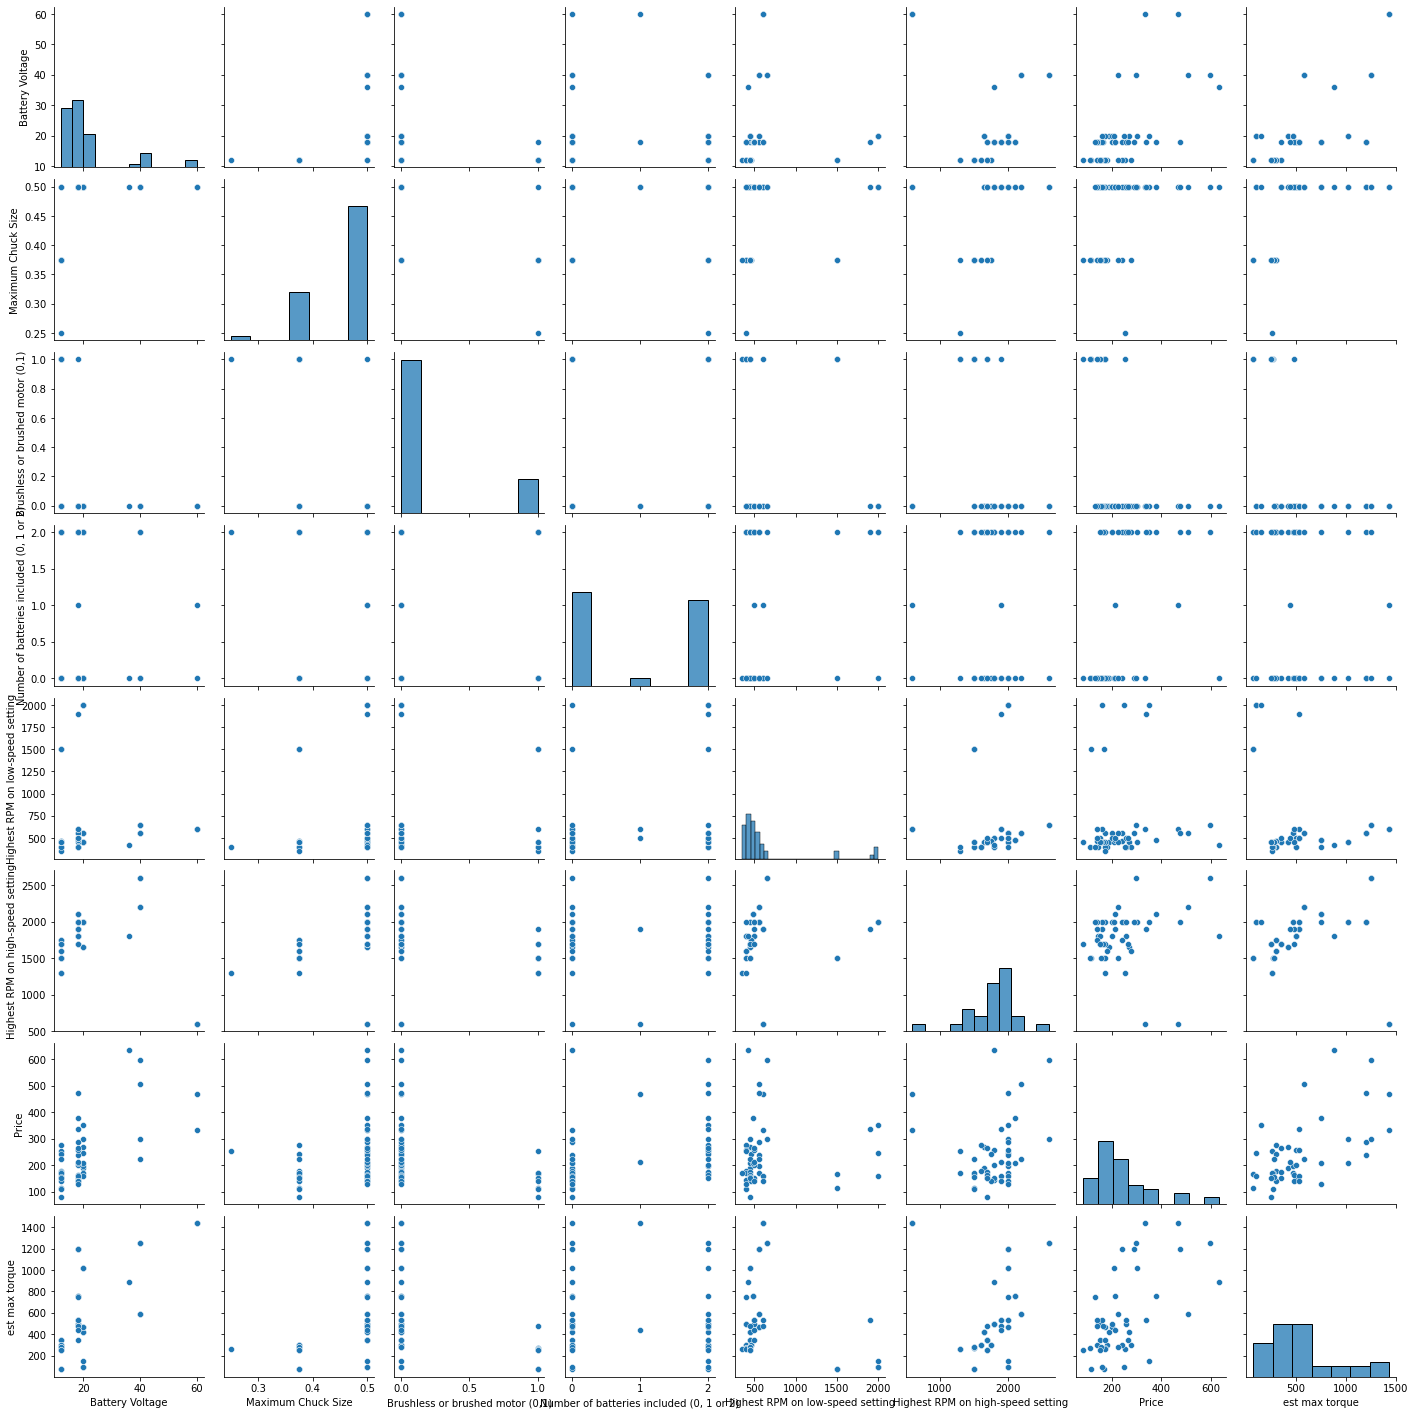

In [40]:
sns.pairplot(df_redo_drop)

## Coefficients Ordered in order of correlation to price:
### Based off graph 
#### 1) est max torque - Coefficient
#### 2) number of batteries - Coefficient
#### 3) brushless/brushed motor - Coefficient
##### ***I picked these based off them exhibiting increases/decreases in price as the RV's themeselves were increasing

# Part 4: Final Polynomial Regression

In [41]:
#First loading in the library
from sklearn.preprocessing import PolynomialFeatures

In [42]:
features = df[['Battery Voltage',
              'Maximum Chuck Size',
              'Brushless or brushed motor (0,1)',
              'Number of batteries included (0, 1 or 2)',
              'Highest RPM on low-speed setting',
              'Highest RPM on high-speed setting',
              'est max torque']].to_numpy(dtype=float)

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features,
                                                   price, 
                                                   test_size = 0.3,
                                                   random_state=0)

In [43]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
poly_regr = LinearRegression()

poly_regr.fit(x_train2,y_train)

y_pred = poly_regr.predict(x_test2)
y_pred_train = poly_regr.predict(x_train2)

mse_test = mean_squared_error(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred_train)

print('Intercept', poly_regr.intercept_)
print('Coefficients: ',poly_regr.coef_)
print('\nTraining Score: ', poly_regr.score(x_train2, y_train))
print('Test Score: ', poly_regr.score(x_test2, y_test))
print('Mean Squared Error Train: ',mse_train)
print('Mean Squared Error Test: ',mse)

Intercept [-9517.5338858]
Coefficients:  [[-1.76440053e-06  2.36484649e+02 -7.65585158e+00 -1.56565103e+02
   6.86275413e+01  4.28018350e+00  1.85386935e+00  3.24911023e+01
   2.87782915e+00  2.63720944e+01 -2.74689666e+02  4.07104206e+00
  -2.50122327e-01 -1.32938320e-01  3.57108590e-02 -6.69887122e+00
  -2.52933393e+01 -1.81912631e+02 -1.50145090e+01  1.88905024e+01
  -8.52107785e+01 -1.56565104e+02 -1.29113013e+01  3.10740356e-01
   1.71995232e+00  3.67557657e+00  1.11873761e+01  8.90718194e-03
  -3.29488179e-02  6.09743234e-02  3.61274154e-04  3.68244424e-03
   1.03759635e-03 -3.41493439e-03  4.71533867e-03 -2.12715478e-04]]

Training Score:  0.9948444393422683
Test Score:  -6.934411227902564
Mean Squared Error Train:  67.09912982360503
Mean Squared Error Test:  5291.013184159865


# Part 5: Large Dataset Regression

Extracting and cleaning the data

In [44]:
class_df = pd.read_csv('ClassDrillData.csv')


In [45]:
#cleaning
class_df = class_df.drop(columns = ['Unnamed: 13',
                                   'Unnamed: 14',])
df.isna().sum()
df = df.dropna()

In [46]:
class_df = class_df.drop(columns = ['Manufacturer','Model','Source'])


In [47]:
class_df["est max torque"] = np.nan


In [48]:
torque_in_lb = class_df["Torque in-lbs"]
low_rpm = class_df["Low Range Max RPM"]
uwo = class_df["UWO"]
class_df["est max torque"] = class_df["est max torque"].astype(float)

In [49]:
#computing the estimated torques
for i in range(0,987):
    #if there is no value given for lb*in torque then it's computes
    #torque = UWO * 560 / low speed RPM
    if np.isnan(torque_in_lb[i]):
        
        est_torque = ( uwo[i] * 560 ) / low_rpm[i] 
        #print(est_torque)
    else:
        est_torque = torque_in_lb[i]
    class_df.at[i,"est max torque"] = est_torque
   

In [50]:
#Dropping rows where there is missing values 
class_df = class_df[class_df['est max torque'].notna()]
class_df = class_df[class_df['Brushless=0/Brushed=1'].notna()]
class_df = class_df[class_df['No. Batteries Included'].notna()]


In [51]:
class_df = class_df.drop(columns=['Torque NM', 'UWO', 'Torque in-lbs'])
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 986
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Voltage                 970 non-null    float64
 1   Chuck Size              970 non-null    float64
 2   Brushless=0/Brushed=1   970 non-null    float64
 3   No. Batteries Included  970 non-null    float64
 4   Low Range Max RPM       970 non-null    int64  
 5   Hi Range Max RPM        970 non-null    int64  
 6   Price                   970 non-null    float64
 7   est max torque          970 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 68.2 KB


## Part 2 with Class Data

In [52]:
torque = class_df[['est max torque']].to_numpy(dtype=float)
price = class_df[['Price']].to_numpy(dtype=float)
#Splitting the data 70% Train 30% Test
x_train, x_test, y_train, y_test = train_test_split(torque,
                                                            price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [53]:
#Fitting the Linear Regression
lin_reg = LinearRegression().fit(x_train, y_train)

#Printing the parameters of the regression

#Determining the MSE and R2 score
y_pred = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

print('\nLinear Regression of Price and est max Torque')
print('\nIntercept: ', lin_reg.intercept_)
print('Coefficients: ', lin_reg.coef_)
print('Train Score: ', lin_reg.score(x_train,y_train))
print('Test Score: ', r2)
print('MSE: ', mse)


Linear Regression of Price and est max Torque

Intercept:  [31.33185719]
Coefficients:  [[0.27149804]]
Train Score:  0.39165683698039777
Test Score:  0.37850343361158656
MSE:  6437.613127051851


In [54]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 986
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Voltage                 970 non-null    float64
 1   Chuck Size              970 non-null    float64
 2   Brushless=0/Brushed=1   970 non-null    float64
 3   No. Batteries Included  970 non-null    float64
 4   Low Range Max RPM       970 non-null    int64  
 5   Hi Range Max RPM        970 non-null    int64  
 6   Price                   970 non-null    float64
 7   est max torque          970 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 68.2 KB


In [55]:
features = class_df[['Voltage',
              'Chuck Size',
              'Brushless=0/Brushed=1',
              'No. Batteries Included',
              'Low Range Max RPM',
              'Hi Range Max RPM',
              'est max torque']].to_numpy(dtype=float)

In [56]:
#Scaling the features
scaler = StandardScaler().fit(features)
trans_features = scaler.transform(features)
trans_features.shape
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features,
                                                   price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [57]:
#Fitting the multi linear regression
mul_reg = LinearRegression().fit(x_train,y_train)

#Determining the MSE and R2 score
y_pred = mul_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the parameters of the regression
print('\nMulti-Linear Regression')
print('\nIntercept: ', mul_reg.intercept_)
print('\nVoltage Coefficient: ', mul_reg.coef_[0,0])
print('Chuck Size Coefficient: ', mul_reg.coef_[0,1])
print('Brush/Brushless Coefficient: ', mul_reg.coef_[0,2])
print('# Batteries Coefficient: ', mul_reg.coef_[0,3])
print('Low Speed RPM Coefficient: ', mul_reg.coef_[0,4])
print('High Speed RPM Coefficient: ', mul_reg.coef_[0,5])
print('Torque Coefficient: ', mul_reg.coef_[0,6])
print('\nTrain Score: ', mul_reg.score(x_train,y_train))
print('Test Score: ', r2)
print('MSE: ', mse)


Multi-Linear Regression

Intercept:  [-27.75261081]

Voltage Coefficient:  -3.1134532738453795
Chuck Size Coefficient:  -76.64063789475215
Brush/Brushless Coefficient:  -1.476454572133273
# Batteries Coefficient:  44.17589576536229
Low Speed RPM Coefficient:  0.0889696529355276
High Speed RPM Coefficient:  0.035817178594572625
Torque Coefficient:  0.26149253609383705

Train Score:  0.5316820950041333
Test Score:  0.48081885166063354
MSE:  5377.805054161069


## Part 3 with Class Data

In [58]:
#Splitting the data
#This run uses the scaled data
x_train, x_test, y_train, y_test = train_test_split(trans_features,
                                                   price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [59]:
#Fitting the multi linear regression with scaled data
mul_reg = LinearRegression().fit(x_train,y_train)

#Determining the MSE and R2 score
y_pred = mul_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the parameters of the regression
print('\nScaled Multi-Linear Regression')
print('\nIntercept: ', mul_reg.intercept_)
print('\nVoltage Coefficient: ', mul_reg.coef_[0,0])
print('Chuck Size Coefficient: ', mul_reg.coef_[0,1])
print('Brush/Brushless Coefficient: ', mul_reg.coef_[0,2])
print('# Batteries Coefficient: ', mul_reg.coef_[0,3])
print('Low Speed RPM Coefficient: ', mul_reg.coef_[0,4])
print('High Speed RPM Coefficient: ', mul_reg.coef_[0,5])
print('Torque Coefficient: ', mul_reg.coef_[0,6])
print('\nTrain Score: ', mul_reg.score(x_train,y_train))
print('Test Score: ', r2)
print('MSE: ', mse)


Scaled Multi-Linear Regression

Intercept:  [150.44089185]

Voltage Coefficient:  -14.682916958301348
Chuck Size Coefficient:  -6.743587598810279
Brush/Brushless Coefficient:  -0.7355847414627763
# Batteries Coefficient:  36.029260704427124
Low Speed RPM Coefficient:  7.794826788753054
High Speed RPM Coefficient:  14.352738498206673
Torque Coefficient:  64.84013812955475

Train Score:  0.5316820950041333
Test Score:  0.4808188516606342
MSE:  5377.805054161062


## Coefficients Ordered in order of correlation to price:
### Based off the magnitude of coefficients
#### 1) Torque - Coefficient
#### 2) # Batteries - Coefficient
#### 3) Voltage - Coefficient
#### 4) High Speed RPM - Coefficient
#### 5) Low Speed RPM - Coefficient
#### 6) Chuck Size - Coefficient
#### 7) Brush/Brushless - Coefficient

In [60]:
#Below Im using statsmodels to find the p value of the regression 
#The lower the p value the higher the correlation
x_train = sm.add_constant(x_train)
est = sm.OLS(y_train,x_train)
est_fit = est.fit()
print(est_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     108.8
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          3.82e-106
Time:                        21:47:30   Log-Likelihood:                -3858.5
No. Observations:                 679   AIC:                             7733.
Df Residuals:                     671   BIC:                             7769.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.4409      2.748     54.739      0.0

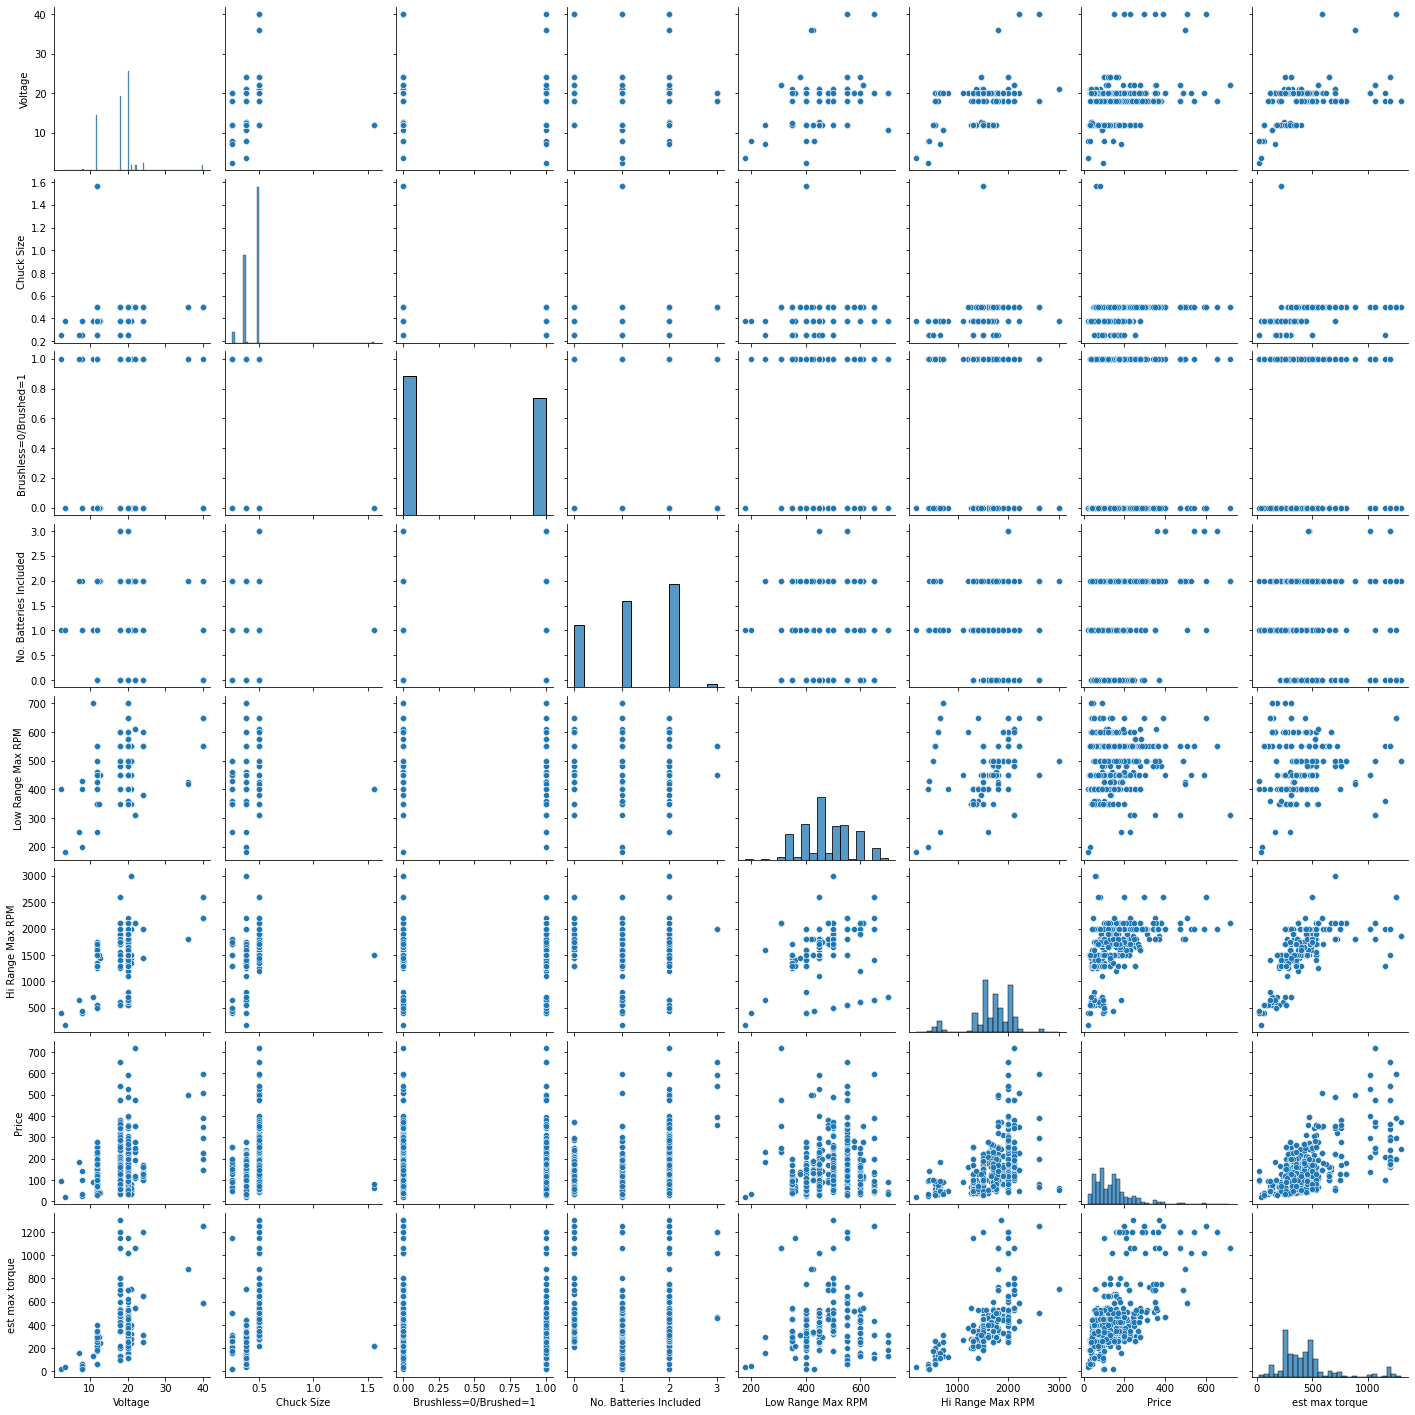

In [61]:
sns.pairplot(class_df)

## Coefficients Ordered in order of correlation to price:
### Based off graph 
#### 1) est max torque - Coefficient
#### 2) Hi Range Max RPM - Coefficient
#### 3) Voltage - Coefficient
##### ***I picked these based off them exhibiting increases/decreases in price as the RV's themeselves were increasing

## Part 4 with Class Data

In [62]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(features,
                                                   price, 
                                                   test_size = 0.3,
                                                   random_state=42)

In [63]:
poly = PolynomialFeatures(degree=2, interaction_only=False)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
ly_regr = LinearRegression()

poly_regr.fit(x_train2,y_train)

y_pred = poly_regr.predict(x_test2)
y_pred_train = poly_regr.predict(x_train2)

mse_test = mean_squared_error(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_pred_train)

print('Intercept', poly_regr.intercept_)
print('Coefficients: ',poly_regr.coef_)
print('\nTraining Score: ', poly_regr.score(x_train2, y_train))
print('Test Score: ', poly_regr.score(x_test2, y_test))
print('Mean Squared Error Train: ',mse_train)
print('Mean Squared Error Test: ',mse)

Intercept [464.66077198]
Coefficients:  [[-7.96442674e-08 -1.62184828e+01 -1.18270328e+03  2.11953571e+00
  -7.74478176e+01  3.66274124e-01 -2.08874500e-01  4.61881607e-01
   6.96076154e-01 -1.36793640e+01 -1.53633094e-01  1.25099729e+00
   1.87521129e-03 -5.41874570e-03 -7.57819801e-04  5.95140464e+01
  -3.64057992e+01 -1.41600574e+02  4.82440890e-01  6.96616919e-01
   5.43474628e-01  2.11953476e+00  4.59718350e+00  2.64627686e-02
  -7.35773164e-03  1.40834840e-02  3.45560324e+01 -1.22547066e-01
   5.76098470e-02  8.73603741e-02 -3.83374096e-04  4.24742601e-04
  -1.64306897e-03 -9.04178999e-05  1.06186311e-04  2.68172352e-05]]

Training Score:  0.7266312939119939
Test Score:  0.5788904862133356
Mean Squared Error Train:  2948.321646780628
Mean Squared Error Test:  5377.805054161062
